# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 3. Covarianza y Correlación**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.  

In [2]:
df = pd.read_csv("datos/soci_econ_country_profiles_resumido.csv", index_col = 0)
df.head(2)

,country,Region,Population in thousands (2017),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),"Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Education: Government expenditure (% of GDP),Quality Of Life Index,Purchasing Power Index,Safety Index,Cost of Living,Restaurant Price Index,Consumer price index (2010 = 100),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,44271,2.0,24.8,73.1,24.9/15.4,2086.3/4.8,5.0,5.3,139.59,58.40,37.37,52.57,50.37,112.887108,0.611,NaN,91.749
1,Australia,Oceania,24451,2.7,21.2,76.1,19.0/21.0,6763.7/28.2,58.2,5.2,176.54,101.94,57.58,80.66,77.12,115.686785,0.803,1.948647,85.904


1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

La covarianza tan solo indica si la relación entre las variables sigue la misma dirección o la contratria, viendose esto en el signo de la covarianza. Si la covarianza es positiva significa que cuando aumenta el valor de una variable aumenta también el de la otra. Si la covarianza es negativa cuando aumenta el valor de una de las variables, disminuye el de la otra.  
 
En la correlación se ve lo mismo que en la covarianza pero además nos indica la fuerza de la relación entre las variables. Las relaciones más fuertes se ven en valores cercanos a -1 y 1 (-1 y 1 indican correlación perfecta), mientras que los valores cercanos a 0 indican que no hay relación entre las variables.

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

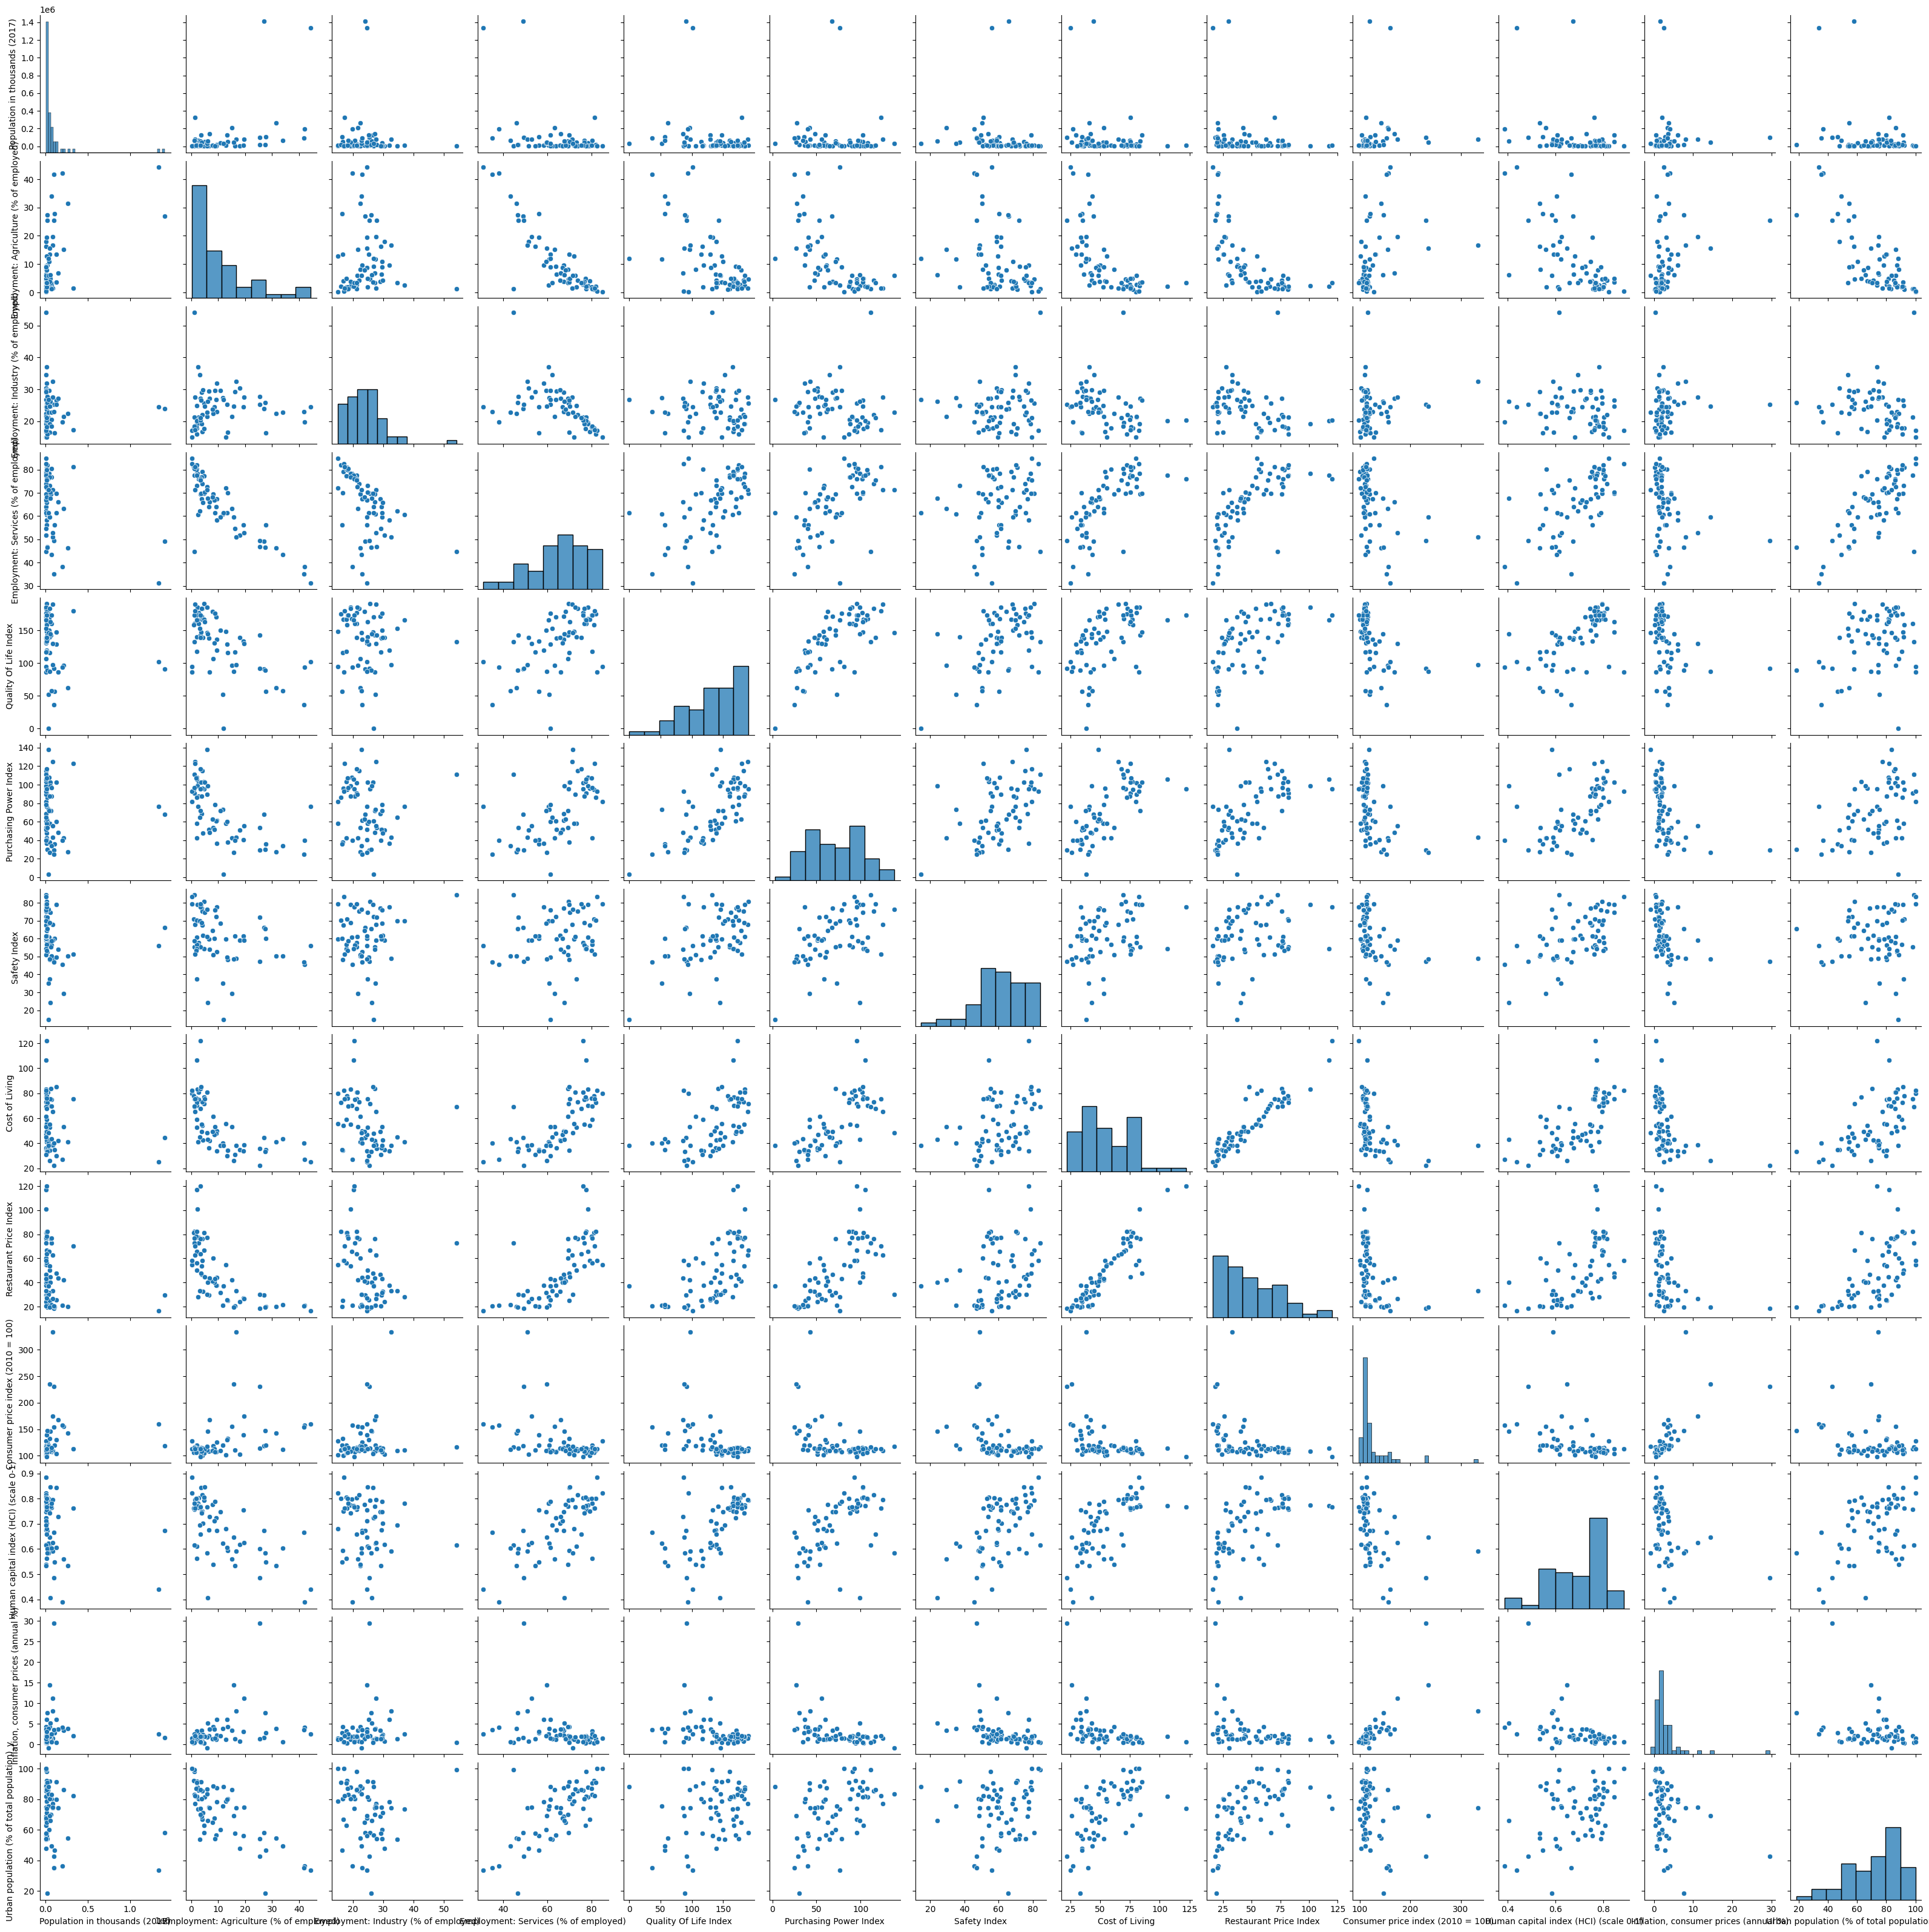

In [3]:
# sacamos primero el pairplot para hacer una primera exploración
sns.pairplot(df);

- En el pairplot podemos ver que aunque algunas variables tienen una relación lineal la mayoría tienen una relación no lineal (apreciamos una curva más que una recta) y por eso decidimos calcular la correlación con el método 'Spearman' en lugar de 'Pearson'. Aplicamos el método a todo el dataframe porque aunque algunas relaciones sean lineales el error no será muy representativo y nos permite una interpretación más ágil de los resultados.

In [4]:
# covarianza
df_numericas = df.select_dtypes(include = np.number)
df_numericas.cov()

,Population in thousands (2017),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Quality Of Life Index,Purchasing Power Index,Safety Index,Cost of Living,Restaurant Price Index,Consumer price index (2010 = 100),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)",Urban population (% of total population)_y
Population in thousands (2017),5.672667e+10,1.258180e+06,-49489.814545,-1.208223e+06,-2.310289e+06,-234202.274671,-328224.254322,-1.036174e+06,-1.409137e+06,1.230950e+06,-7591.914087,11601.513975,-1.228867e+06
Employment: Agriculture (% of employed),1.258180e+06,1.205948e+02,1.360149,-1.219522e+02,-2.924421e+02,-202.500448,-49.072989,-1.474145e+02,-1.825817e+02,1.636871e+02,-0.828262,14.712111,-1.502375e+02
Employment: Industry (% of employed),-4.948981e+04,1.360149e+00,38.376347,-3.968304e+01,-1.460244e+01,-23.946927,11.043266,-4.080189e+01,-4.613619e+01,3.656085e+01,-0.113809,2.465644,-1.579182e+01
Employment: Services (% of employed),-1.208223e+06,-1.219522e+02,-39.683037,1.615813e+02,3.071535e+02,226.478643,38.132959,1.881214e+02,2.286167e+02,-2.002527e+02,0.941898,-17.175859,1.659383e+02
Quality Of Life Index,-2.310289e+06,-2.924421e+02,-14.602441,3.071535e+02,1.772999e+03,894.103497,299.492861,4.614750e+02,6.293552e+02,-6.671830e+02,2.582237,-57.106645,2.175842e+02
Purchasing Power Index,-2.342023e+05,-2.025004e+02,-23.946927,2.264786e+02,8.941035e+02,898.061585,196.433878,4.374981e+02,4.935993e+02,-4.676223e+02,1.750123,-55.680893,2.481094e+02
Safety Index,-3.282243e+05,-4.907299e+01,11.043266,3.813296e+01,2.994929e+02,196.433878,200.519340,1.058037e+02,9.705651e+01,-1.841728e+02,0.821228,-19.064946,2.726022e+01
Cost of Living,-1.036174e+06,-1.474145e+02,-40.801891,1.881214e+02,4.614750e+02,437.498062,105.803712,4.368209e+02,4.805713e+02,-3.374167e+02,1.578599,-39.216560,2.146246e+02
Restaurant Price Index,-1.409137e+06,-1.825817e+02,-46.136187,2.286167e+02,6.293552e+02,493.599305,97.056507,4.805713e+02,6.187290e+02,-3.548079e+02,1.667569,-38.662982,2.559821e+02
Consumer price index (2010 = 100),1.230950e+06,1.636871e+02,36.560850,-2.002527e+02,-6.671830e+02,-467.622328,-184.172830,-3.374167e+02,-3.548079e+02,1.381868e+03,-1.776388,109.550835,-1.453601e+02


- Las variables que tienen covarianza negativa están inversamente relacionadas y las que tienen el signo positivo están directamente relacionadas

In [5]:
# correlacion
correl = df_numericas.corr(method='spearman')
correl

,Population in thousands (2017),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Quality Of Life Index,Purchasing Power Index,Safety Index,Cost of Living,Restaurant Price Index,Consumer price index (2010 = 100),Human capital index (HCI) (scale 0-1),"Inflation, consumer prices (annual %)",Urban population (% of total population)_y
Population in thousands (2017),1.000000,0.343351,-0.058540,-0.279261,-0.359775,-0.207390,-0.501957,-0.281161,-0.358463,0.487912,-0.307680,0.416392,-0.137377
Employment: Agriculture (% of employed),0.343351,1.000000,0.275443,-0.828677,-0.579413,-0.714177,-0.384672,-0.783302,-0.814898,0.435156,-0.649493,0.436576,-0.708130
Employment: Industry (% of employed),-0.058540,0.275443,1.000000,-0.644879,-0.138167,-0.249611,0.069794,-0.457133,-0.428786,0.103631,-0.217952,0.193708,-0.360683
Employment: Services (% of employed),-0.279261,-0.828677,-0.644879,1.000000,0.585389,0.649374,0.237636,0.796342,0.823010,-0.451038,0.639271,-0.393846,0.692741
Quality Of Life Index,-0.359775,-0.579413,-0.138167,0.585389,1.000000,0.715771,0.444342,0.600250,0.685322,-0.653846,0.653022,-0.455540,0.217662
Purchasing Power Index,-0.207390,-0.714177,-0.249611,0.649374,0.715771,1.000000,0.446618,0.741572,0.722563,-0.454716,0.630676,-0.548031,0.459644
Safety Index,-0.501957,-0.384672,0.069794,0.237636,0.444342,0.446618,1.000000,0.358317,0.311216,-0.449730,0.504510,-0.551700,0.136335
Cost of Living,-0.281161,-0.783302,-0.457133,0.796342,0.600250,0.741572,0.358317,1.000000,0.911919,-0.524130,0.733198,-0.586172,0.632049
Restaurant Price Index,-0.358463,-0.814898,-0.428786,0.823010,0.685322,0.722563,0.311216,0.911919,1.000000,-0.510674,0.671665,-0.491672,0.659193
Consumer price index (2010 = 100),0.487912,0.435156,0.103631,-0.451038,-0.653846,-0.454716,-0.449730,-0.524130,-0.510674,1.000000,-0.555056,0.778322,-0.143156


- En el siguiente ejercicio, en el heatmap analizamos los resultados de correlación

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

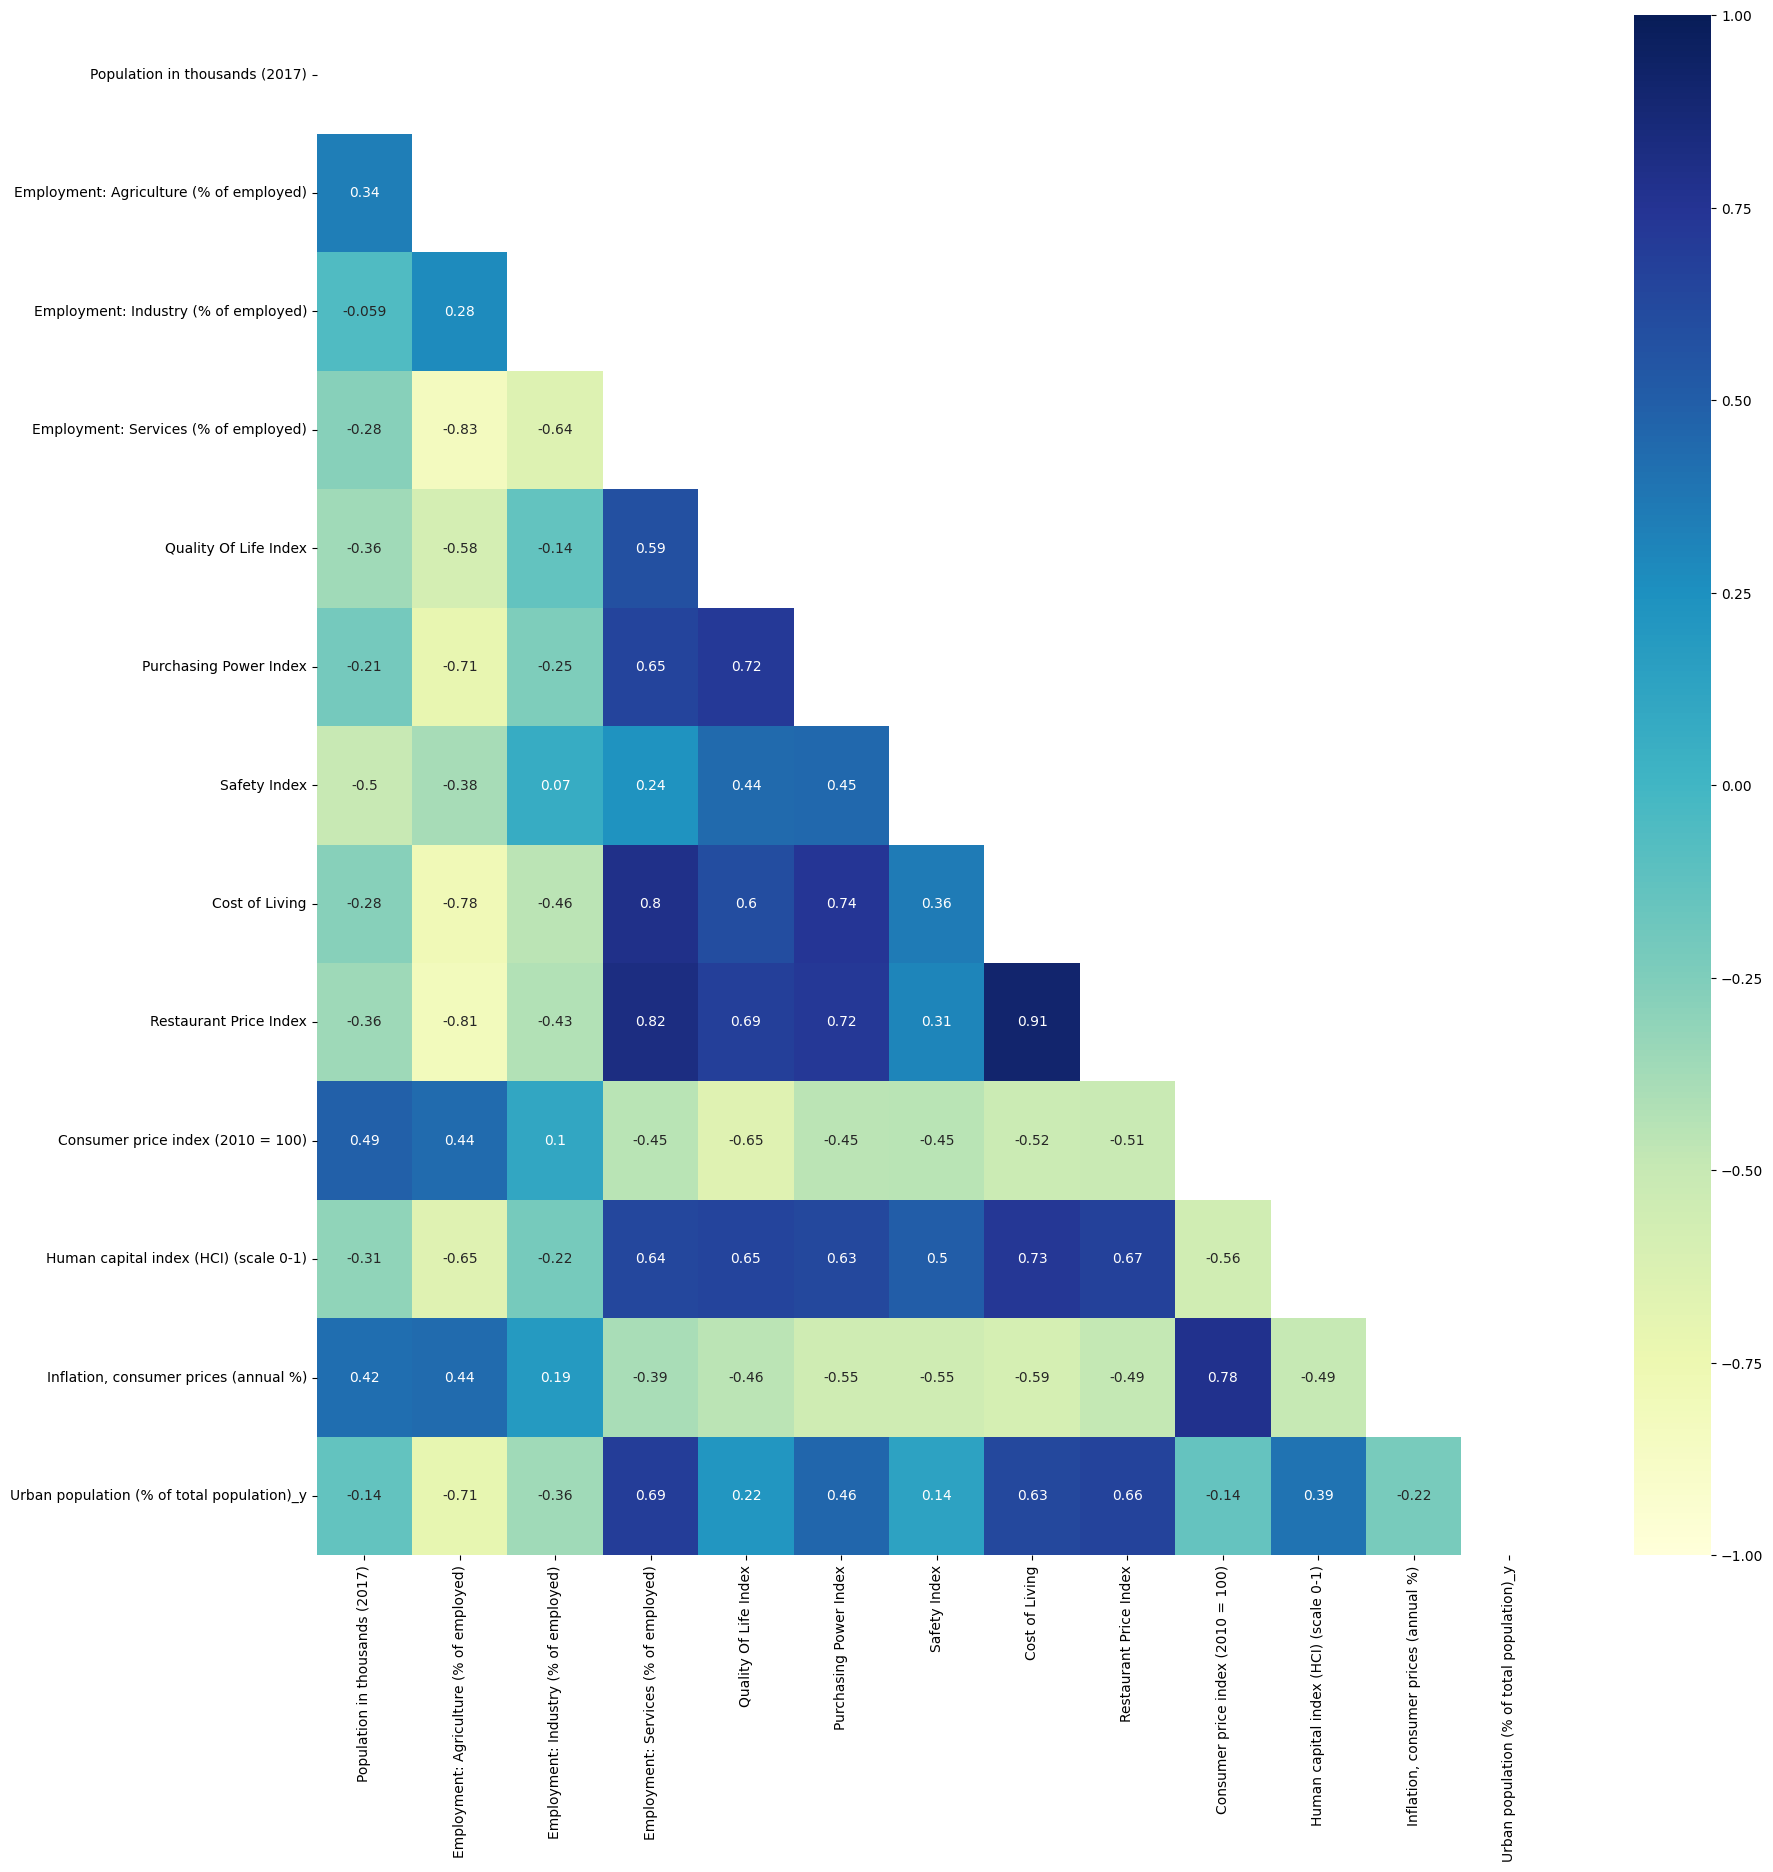

In [6]:
# sacamos el heatmap
mask = np.triu(np.ones_like(correl, dtype = np.bool_))

sns.heatmap(correl, 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1)

plt.savefig('datos/heatmap.jpeg');

- Como vemos la variable respuesta tiene una correlación positiva muy alta con las columnas 'Cost of living' y 'Employment: Services (% of employed)' y alta con 'Quality Of Life Index' y 'Purchasing Power Index'. Con la columna 'Safety Index' la correlación es positiva y baja. También tiene una correlación negativa muy alta con 'Employment: Agriculture (% of employed)' y baja con 'Population in thousands (2017)' y 'Population in thousands (2017)'.

4. Guardad la gráfica del heatmap.

- Se ha incluido el código para guardarlo en el ejecicio anterior